# Network Creation

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import community as community_louvain
from pyvis.network import Network
import seaborn as sns
import random
import os

In [2]:
relationship_df = pd.read_csv('interacciones.csv', sep=';', encoding='utf-8', decimal=',')
relationship_df = relationship_df.drop(['Unnamed: 0'], axis=1)

In [3]:
relationship_df.head(2)

,source,target,value
0,Rick,Morty,1201
1,Morty,Rick,792


In [4]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

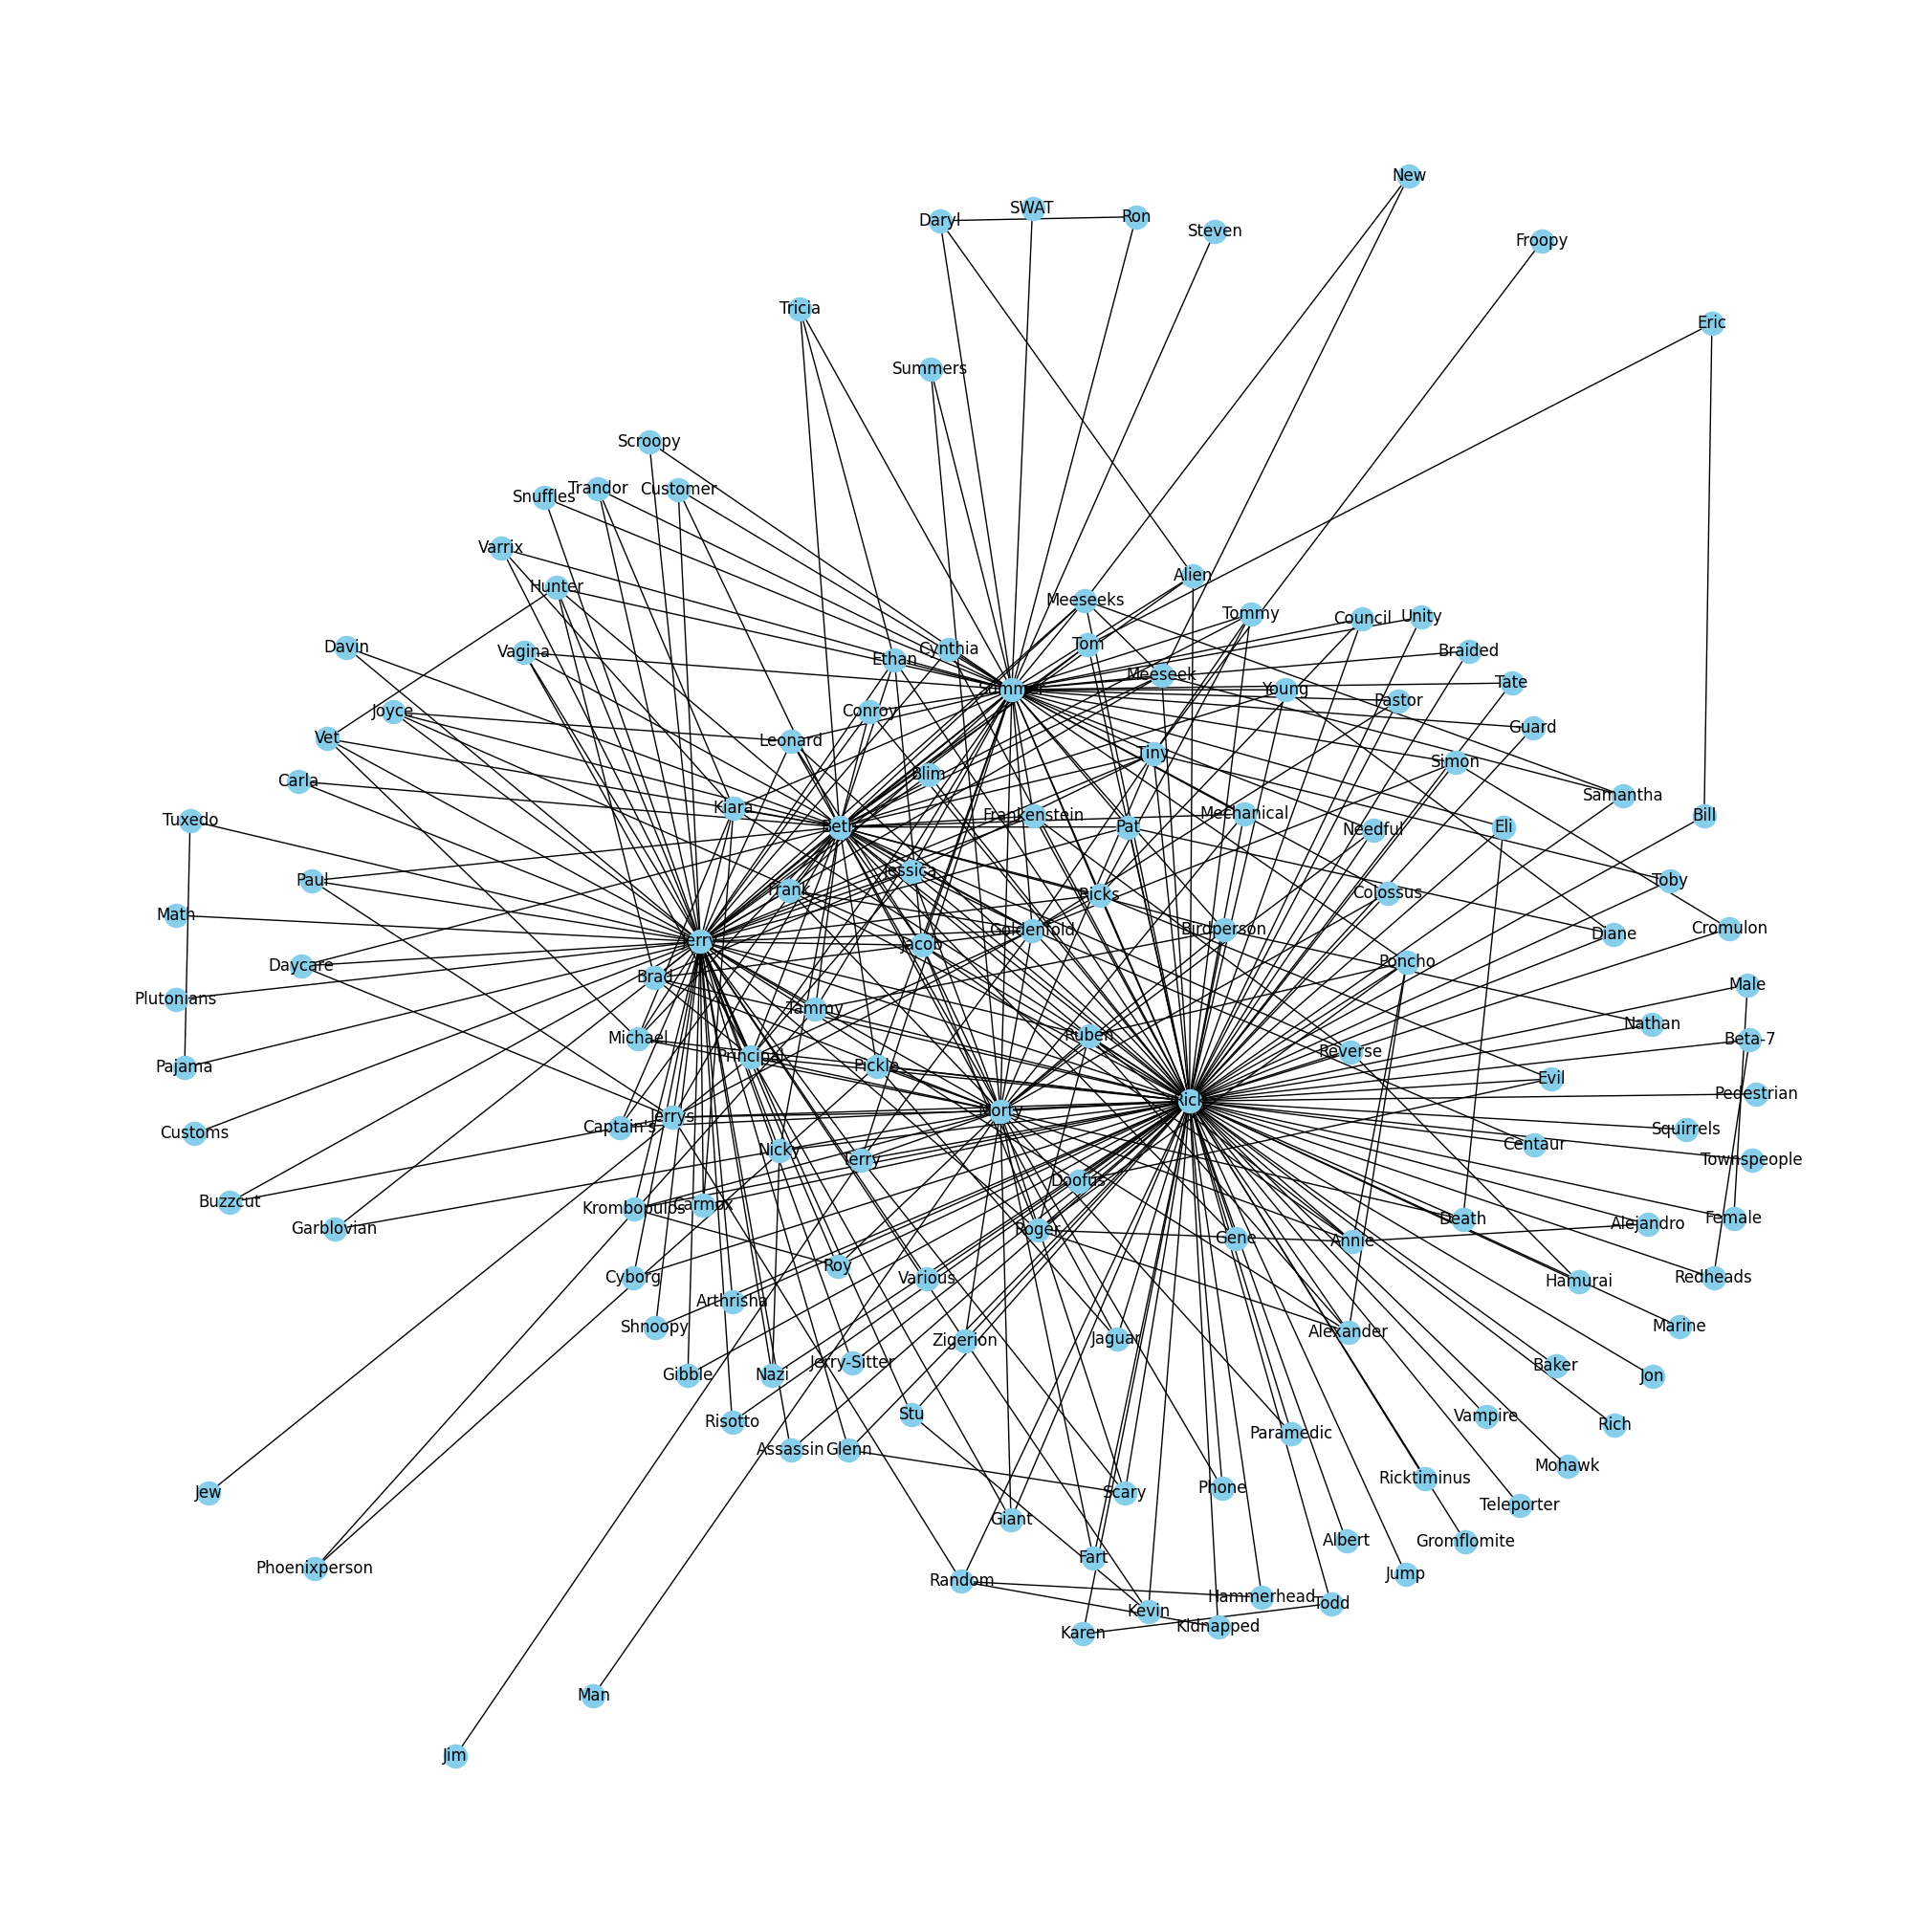

In [5]:
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.savefig('network_blue.jpg')
plt.show()

# Network Analysis

In [6]:
pd.options.display.float_format = '{:.2f}'.format

## Closeness Centrality

In [7]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness']).reset_index()
closeness_df.rename(columns={'index':'character'}, inplace=True)
closeness_df = closeness_df.sort_values(by='closeness', ascending=False).reset_index(drop=True)

In [8]:
closeness_df

,character,closeness
0,Rick,0.81
1,Jerry,0.65
2,Summer,0.61
3,Beth,0.59
4,Morty,0.56
...,...,...
138,Froopy,0.34
139,Phoenixperson,0.34
140,New,0.34
141,Jim,0.34


In [9]:
filtered_closeness = closeness_df[closeness_df['closeness'] < 0.56].sort_values(by='closeness',
                                                                                ascending=False).reset_index(drop=True)
filtered_closeness.head(10)

,character,closeness
0,Goldenfold,0.52
1,Principal,0.51
2,Jessica,0.51
3,Tiny,0.51
4,Jacob,0.51
5,Terry,0.50
6,Meeseeks,0.50
7,Meeseek,0.50
8,Kiara,0.50
9,Ricks,0.50


C:\Users\arace\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


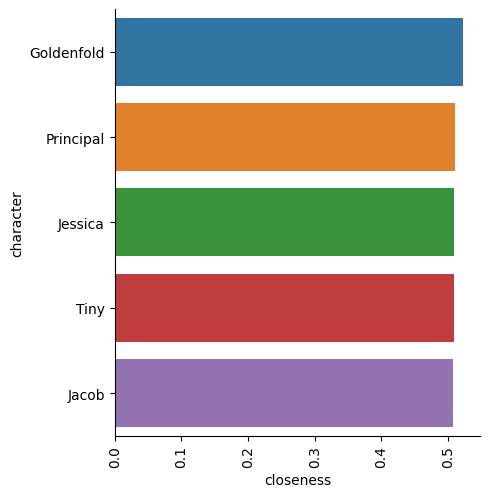

In [10]:
sns.catplot(data=filtered_closeness.head(5), x='closeness', y='character', kind='bar', orient='h')
plt.xticks(rotation=90)
plt.show()

**Closeness Centrality**

La medida de cercanía es una métrica utilizada en el análisis de redes para evaluar la importancia relativa de un nodo en función de su accesibilidad y proximidad a otros nodos en la red.

En la red de 'Rick and Morty', Rick (0.81) se destaca como el personaje más relevante debido a su mayor cercanía con respecto a otros personajes, seguido por los miembros de la familia Smith-Sanchez, en orden de importancia: Jerry (0.65), Summer (0.61), Beth (0.59) y, finalmente, Morty.

Después de los personajes principales, también identificamos a los personajes secundarios que muestran un alto grado de cercanía. Entre ellos se destacan Goldenfold, Principal y Jessica como personajes notables en la red.

## Betweenness Centrality

Se refiere a que personaje tiene la mejor conexión en el network de Rick and Morty.

In [11]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['betweenness']).reset_index()
betweenness_df.rename(columns={'index':'character'}, inplace=True)
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)

In [12]:
betweenness_df

,character,betweenness
0,Rick,0.61
3,Jerry,0.22
4,Summer,0.14
5,Beth,0.07
1,Morty,0.05
...,...,...
64,Daycare,0.00
63,Roy,0.00
62,Krombopulos,0.00
60,Tuxedo,0.00


In [13]:
filtered_betweenness = betweenness_df[(betweenness_df['betweenness'] < 0.04) & (betweenness_df['betweenness'] > 0.00)].reset_index(drop=True).head(15)
filtered_betweenness.head(10)

,character,betweenness
0,Principal,0.02
1,Tiny,0.02
2,Terry,0.01
3,Tom,0.01
4,Meeseeks,0.01
5,Meeseek,0.01
6,Tammy,0.01
7,Jerrys,0.01
8,Pickle,0.01
9,Goldenfold,0.01


In [14]:
filtered_betweenness[filtered_betweenness['character'] == 'Goldenfold']

,character,betweenness
9,Goldenfold,0.01


C:\Users\arace\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


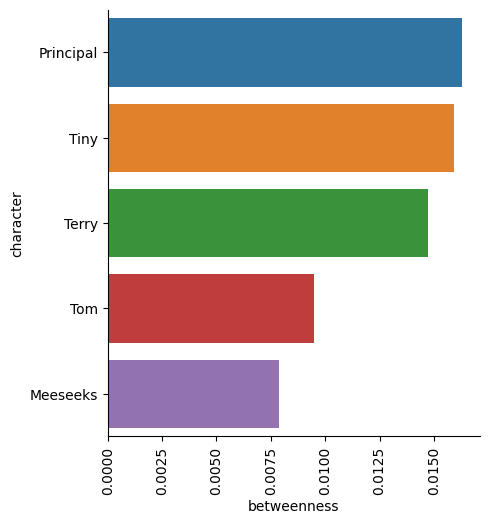

In [15]:
sns.catplot(data=filtered_betweenness.head(5), x='betweenness', y='character', kind='bar', orient='h')
plt.xticks(rotation=90)
plt.show()

**Betweenness Centrality**

El grado de intermediación es una métrica utilizada en el análisis de redes para evaluar la importancia relativa de un nodo como intermediario en las comunicaciones o flujos de información entre nodos en la red. Básicamente, la intermediación de grado mide cuántos caminos más cortos entre pares de nodos pasan a través de un nodo en particular.

En este contexto, el orden de importancia de los personajes principales en la red, como Rick, Jerry, Summer, Beth y Morty, permanece sin cambios.

Sin embargo, observamos diferencias significativas entre los personajes secundarios. El personaje Principal (0.02) se destaca como el siguiente en importancia en términos de intermediación, mientras que Goldenfold (0.01) ocupa el décimo lugar y Jessica ya no se encuentra en los primeros puestos de esta métrica.

## Degree Centrality

In [16]:
degree_centrality = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['centrality']).reset_index()
degree_df.rename(columns={'index':'character'}, inplace=True)
degree_df = degree_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

In [17]:
degree_df.describe()

,centrality
count,143.00
mean,0.04
std,0.08
min,0.01
25%,0.01
50%,0.02
75%,0.03
max,0.77


In [18]:
degree_df

,character,centrality
0,Rick,0.77
1,Jerry,0.47
2,Summer,0.37
3,Beth,0.31
4,Morty,0.24
...,...,...
138,Teleporter,0.01
139,Customs,0.01
140,Albert,0.01
141,Jim,0.01


In [19]:
filtered_degree = degree_df[(degree_df['centrality'] <= 0.23) & (degree_df['centrality'] >= 0.03)].head(10).reset_index(drop=True)
filtered_degree

,character,centrality
0,Goldenfold,0.11
1,Principal,0.08
2,Jacob,0.07
3,Tiny,0.07
4,Jessica,0.06
5,Jerrys,0.06
6,Ruben,0.06
7,Kiara,0.06
8,Ricks,0.06
9,Terry,0.05


C:\Users\arace\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


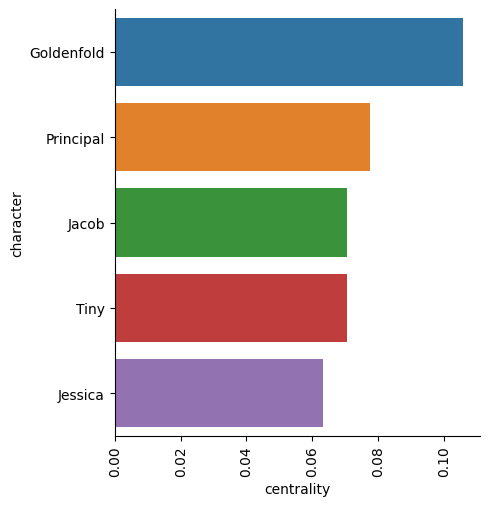

In [20]:
sns.catplot(data=filtered_degree.head(5), x='centrality', y='character', kind='bar', orient='h')
plt.xticks(rotation=90)
plt.show()

**Grado de Centralidad (Degree Centrality)**

La medida de grado de un nodo es el número de conexiones que tiene con otros nodos en la red. Los nodos con un alto grado son considerados centrales ya que tienen muchas conexiones.  Esta medida es útil para identificar nodos influyentes en términos de la cantidad de conexiones que tienen.

Dentro de la red creada con los personajes de Rick and Morty encontramos que el personaje con mayor número de conexiones es Rick (0.77), seguido de Jerry (0.47), Summer (0.37), Beth (0.31) y finalmente Morty (0.24).  Estas conexiones llaman la atención pues Morty es el segundo personaje principal en la historia pero es quien tiene menos conexiones en la red dentro de la familia.

Entre los personajes secundarios encontramos que Goldenfold (0.11) y Principal (0.08) son los personajes con más conexiones.

## Eigenvector Centrality

In [21]:
eigenvector_dict = nx.eigenvector_centrality(G)
eigenvector_df = pd.DataFrame.from_dict(eigenvector_dict, orient='index', columns=['eigenvector']).reset_index()
eigenvector_df.rename(columns={'index':'character'}, inplace=True)
eigenvector_df = eigenvector_df.sort_values(by='eigenvector', ascending=False).reset_index(drop=True)

In [22]:
eigenvector_df.head(12)

,character,eigenvector
0,Rick,0.45
1,Jerry,0.34
2,Summer,0.29
3,Beth,0.28
4,Morty,0.23
5,Goldenfold,0.15
6,Jessica,0.13
7,Principal,0.13
8,Tiny,0.12
9,Jacob,0.12


In [23]:
filtered_eigenvector = eigenvector_df[(eigenvector_df['eigenvector'] <= 0.16) & (eigenvector_df['eigenvector'] >= 0.10)].reset_index(drop=True)
filtered_eigenvector

,character,eigenvector
0,Goldenfold,0.15
1,Jessica,0.13
2,Principal,0.13
3,Tiny,0.12
4,Jacob,0.12
5,Frank,0.11
6,Ricks,0.10


C:\Users\arace\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


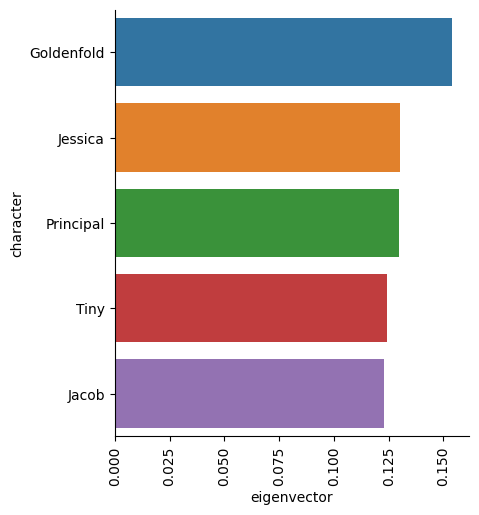

In [24]:
sns.catplot(data=filtered_eigenvector.head(5), x='eigenvector', y='character', kind='bar', orient='h')
plt.xticks(rotation=90)
plt.show()

**Eigenvector Centrality**

Es una medida utilizada en análisis de redes para evaluar la importancia relativa a un nodo en función de las conexiones que tiene con otros nodos influyentes en la red. En esencia esta medida considera tanto la cantidad como la calidad de las conexiones de un nodo.

Al igual que en las otras medidas, el orden de los personajes principales no cambia, Rick (0.45), Jerry (0.34), Summer (0.29), Beth (0.29) y Morty (0.23).
 

Sin embargo, los personajes secundarios con mejor conexión hacia los personajes principales son Goldenfold (0.15), Jessica (0.13), Principal (0.13).

# PageRank

In [25]:
pagerank_dict = nx.pagerank(G)
pagerank_df = pd.DataFrame.from_dict(pagerank_dict, orient='index', columns=['pagerank']).reset_index()
pagerank_df.rename(columns={'index':'character'}, inplace=True)
pagerank_df = pagerank_df.sort_values(by='pagerank', ascending=False).reset_index(drop=True)

In [26]:
pagerank_df

,character,pagerank
0,Rick,0.14
1,Jerry,0.08
2,Summer,0.06
3,Beth,0.05
4,Morty,0.04
...,...,...
138,Customs,0.00
139,Jew,0.00
140,SWAT,0.00
141,Steven,0.00


In [27]:
filtered_pagerank = pagerank_df[(pagerank_df['pagerank'] <= 0.04)].reset_index(drop=True)
filtered_pagerank

,character,pagerank
0,Morty,0.04
1,Goldenfold,0.02
2,Principal,0.01
3,Tiny,0.01
4,Jacob,0.01
...,...,...
134,Customs,0.00
135,Jew,0.00
136,SWAT,0.00
137,Steven,0.00


**Page Rank**

Al igual que las otras métricas, Page Rank conserva el orden de los personajes principales, que son Rick, Jerry, Summer, Beth y Morty. Entre los personajes secundarios, destacan Goldenfold y Principal en términos de su ranking.

In [28]:
# Save centrality measures
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# By Community

Utilizando la biblioteca Louvain, se generan comunidades dentro de la red de Rick and Morty, y luego se realiza un análisis de estas comunidades.

In [29]:
communities = community_louvain.best_partition(G)

In [30]:
df_communities = pd.DataFrame(list(communities.items()), columns=['Character', 'Community'])
df_communities['Community'].unique()

array([0, 5, 2, 3, 4, 6, 1], dtype=int64)

## Rick

In [31]:
df_communities[df_communities['Community'] == 0].head(3)

,Character,Community
0,Rick,0
9,Tom,0
21,Eric,0


In [32]:
df_communities[df_communities['Community'] == 0].reset_index(drop=True).count()

Character    39
Community    39
dtype: int64

## Meeseks

In [33]:
df_communities[df_communities['Community'] == 1].head(3)

,Character,Community
29,Meeseeks,1
31,Meeseek,1
32,New,1


In [34]:
df_communities[df_communities['Community'] == 1].reset_index(drop=True).reset_index(drop=True).count()

Character    4
Community    4
dtype: int64

## Jerry

In [35]:
df_communities[df_communities['Community'] == 2].head(3)

,Character,Community
3,Jerry,2
57,Blim,2
58,Jerry-Sitter,2


In [36]:
df_communities[df_communities['Community'] == 2].reset_index(drop=True).reset_index(drop=True).count()

Character    28
Community    28
dtype: int64

## Summer

In [37]:
df_communities[df_communities['Community'] == 3].head(3)

,Character,Community
4,Summer,3
24,Snuffles,3
34,Ricks,3


In [38]:
df_communities[df_communities['Community'] == 3].reset_index(drop=True).reset_index(drop=True).count()

Character    19
Community    19
dtype: int64

## Beth

In [39]:
df_communities[df_communities['Community'] == 4].head(3)

,Character,Community
5,Beth,4
8,Davin,4
13,Leonard,4


In [40]:
df_communities[df_communities['Community'] == 4].reset_index(drop=True).reset_index(drop=True).count()

Character    18
Community    18
dtype: int64

## Morty

In [41]:
df_communities[df_communities['Community'] == 5].head(3)

,Character,Community
1,Morty,5
2,Jessica,5
6,Goldenfold,5


In [42]:
df_communities[df_communities['Community'] == 5].reset_index(drop=True).reset_index(drop=True).count()

Character    29
Community    29
dtype: int64

## Random

In [43]:
df_communities[df_communities['Community'] == 6].head(3)

,Character,Community
12,Ruben,6
16,Poncho,6
17,Roger,6


In [44]:
df_communities[df_communities['Community'] == 6].reset_index(drop=True).reset_index(drop=True).count()

Character    6
Community    6
dtype: int64

In [45]:
num_communities = df_communities.groupby('Community').count().reset_index()
num_communities

,Community,Character
0,0,39
1,1,4
2,2,28
3,3,19
4,4,18
5,5,29
6,6,6


In [62]:
num_communities['Community'] = num_communities['Community'].replace({
    0: 'Rick',
    1: 'Meeseks',
    2: 'Jerry',
    3: 'Summer',
    4: 'Beth',
    5: 'Morty',
    6: 'Random'})
num_communities


,Community,Character
0,Rick,39
1,Random,4
2,Jerry,28
3,Summer,19
4,Beth,18
5,Morty,29
6,Random,6


C:\Users\arace\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


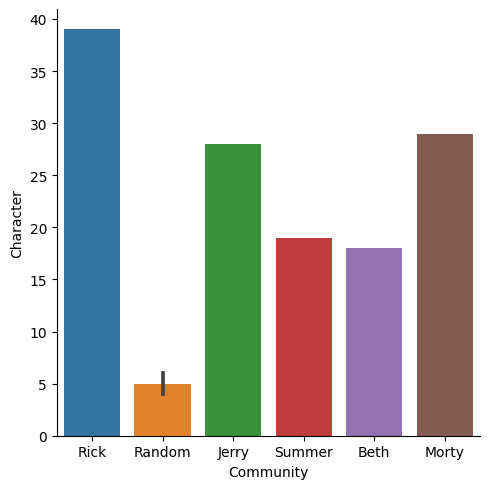

In [63]:
sns.catplot(num_communities, x='Community', y='Character', kind='bar')
plt.savefig('barras.jpg')

En el analisis observamos que hay seis comunidades visibles siendo la mas grande la de Rick(39), seguida de Morty(29), Jerry(28), Summer(19), Beth(18), Random(6), Meeseks (4).

# Interactive Graph

In [48]:
nx.set_node_attributes(G, communities, 'group')

In [49]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
net.repulsion()
node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("R&M_network_1.html")

R&M_network_1.html


<img src="comunidades.png" alt="R&M Network">

Se utilizó la biblioteca Pyvis para crear una imagen interactiva que representa las comunidades en la que se pueden observar las conexiones entre nodos y su importancia.

# Weighted Degree

El "weighted degree" (grado ponderado) es una medida utilizada en el análisis de redes para cuantificar la importancia de un nodo en una red teniendo en cuenta tanto la cantidad de conexiones que tiene como los valores asociados a esas conexiones. En otras palabras, el grado ponderado considera no solo cuántos nodos están conectados a un nodo en una red, sino también la "fuerza" o "peso" de esas conexiones.

In [50]:
weighted_degrees = dict(nx.degree(G,weight='weight'))
max_degree = max(weighted_degrees.values())

In [51]:
df_weighted = pd.DataFrame.from_dict(weighted_degrees, orient='index', columns=['weight']).reset_index()
df_weighted = df_weighted.sort_values(by='weight', ascending=False).reset_index(drop=True)

In [52]:
df_weighted

,index,weight
0,Rick,109
1,Jerry,67
2,Summer,52
3,Beth,44
4,Morty,34
...,...,...
138,Teleporter,1
139,Customs,1
140,Albert,1
141,Jim,1


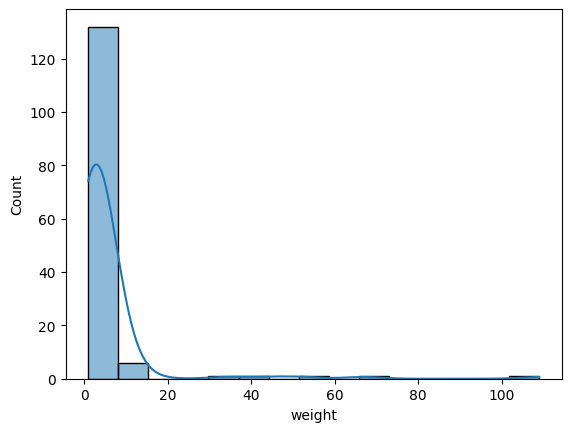

In [53]:
sns.histplot(df_weighted['weight'], kde=True, bins=15)
plt.show()

En esta gráfica, podemos notar que al considerar el grado ponderado en la red de Rick and Morty, más de 120 personajes exhiben una importancia bastante baja en términos de su peso. Este fenómeno se debe en gran parte a que muchos de estos personajes solo hacen una aparición en un episodio y, en algunos casos, su diálogo puede constar de una sola palabra.

# Simulación de contagio

Una vez hecho el analisis de los grados y comunidades, podemos usar un modelo de Independent Cascade (Cascada Independiente) que es un modelo utilizado en la teoría de redes, especialmente en el campo de la propagación de información o influencia en redes sociales y sistemas de difusión. Este modelo se utiliza para simular cómo se propagan las influencias, ideas o información a través de una red de nodos interconectados.

In [54]:
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
top_5_nodes = sorted_nodes[:5]

In [55]:
pos = nx.spring_layout(G,weight='weight',iterations=20, k = 4)

In [56]:
infection_times = {}

In [57]:
def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [58]:
for u, v, data in G.edges(data=True):
    if 'weight' not in data:
        # Si no hay peso, asignar un peso aleatorio entre 1 y 10
        G[u][v]['weight'] = random.randint(1, 10)

In [59]:
if not os.path.exists('imagenes'):
    os.makedirs('imagenes')

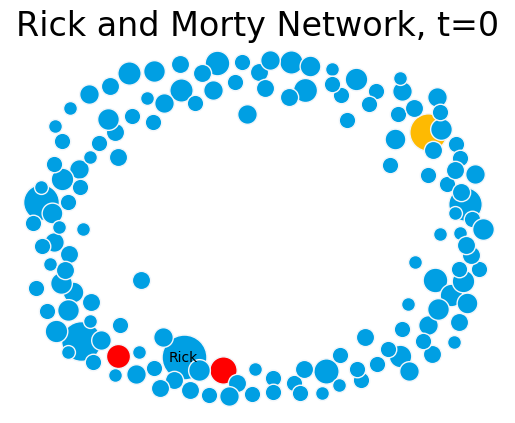

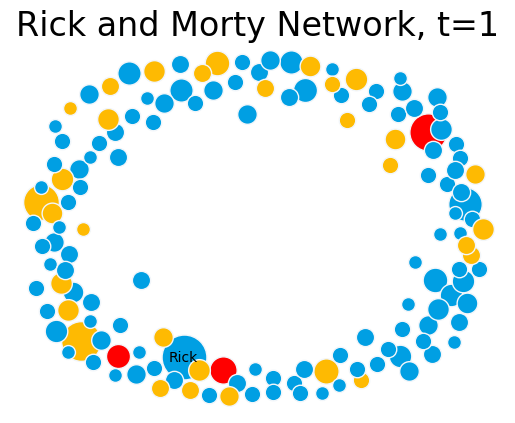

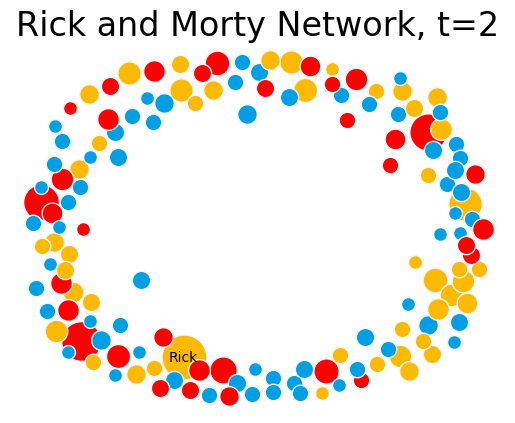

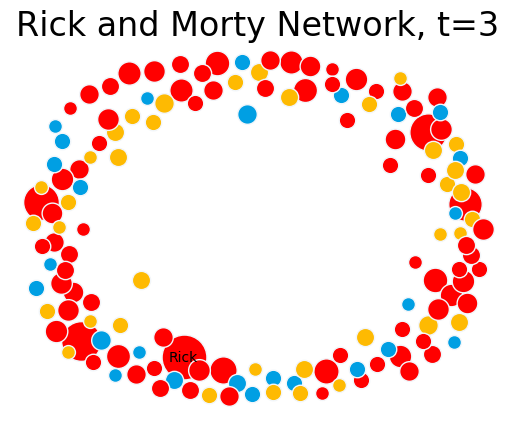

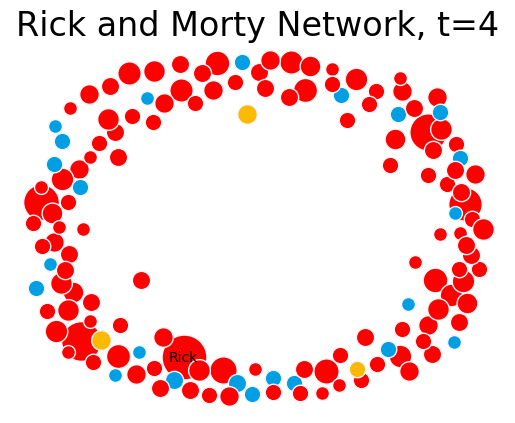

In [60]:
def plot_G(G, pos, infection_times, t):
    current_infectious = [n for n in infection_times if infection_times[n] == t]
    plt.figure()
    plt.axis('off')
    plt.title('Rick and Morty Network, t={}'.format(t), fontsize=24)

    for node in G.nodes():
        size = 100 * weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node, 9999999) < t:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='#ff0000')
        else:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    
    nx.draw_networkx_labels(G, pos, {n: n.replace('-', '\n') for n in G.nodes() if weighted_degrees[n] > 100}, font_size=10)

    for e in G.edges(data=True):
        if e[2].get('weight', 0) > 10:  # Utilizando get() para obtener el atributo 'weight' con valor predeterminado 0
            nx.draw_networkx_edges(G, pos, [e], width=e[2].get('weight', 0) / 100, edge_color='#707070')

infection_times = {'Jessica': -1, 'Goldenfold': -1, 'Summer': 0}
for t in range(5):
    plot_G(G, pos, infection_times, t)
    infection_times = independent_cascade(G, t, infection_times)
    
    plt.savefig(f'imagenes/sinnombre_{t}.png', format='png')

plt.show()


Una vez que hemos realizado la propagación de la influencia o información en la red, avanzamos hacia la etapa de visualización del modelo que se enfoca en tres personajes en particular: **Jessica, Goldenfold y Summer**.

Durante la visualización, se hacen observaciones interesantes. En este contexto, notamos que la propagación de la influencia o información requiere un total de 5 iteraciones para afectar prácticamente a todos los nodos en la red. Este hallazgo resalta la velocidad y el alcance de la difusión, lo cual puede tener implicaciones significativas en la comprensión de cómo se propaga la información en esta red específica y en la eficacia de las estrategias de difusión o influencia que se pueden emplear en este contexto.

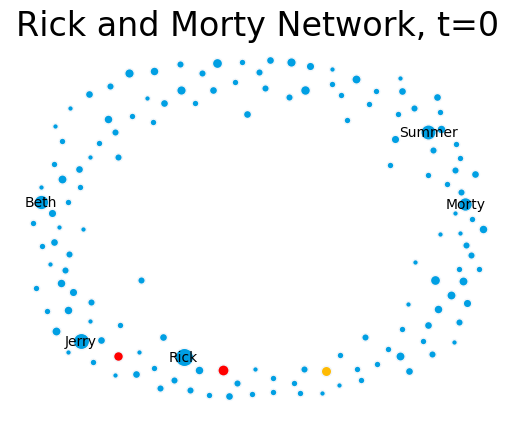

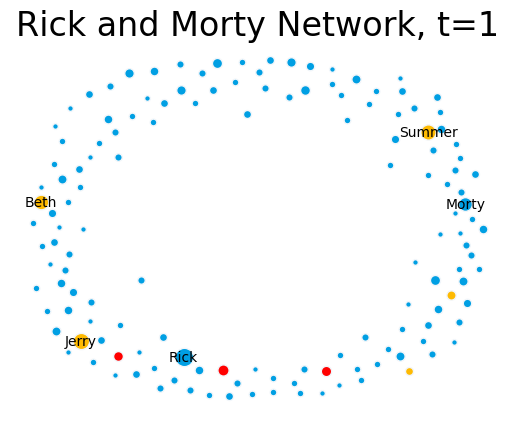

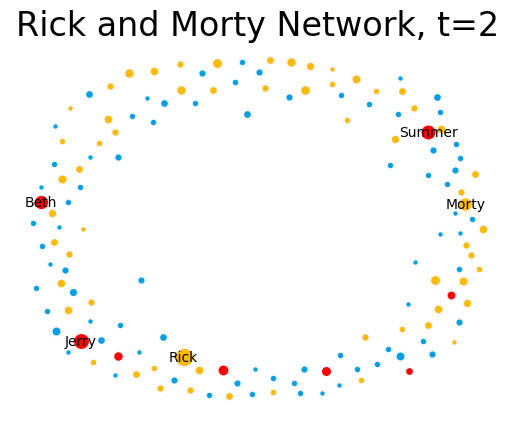

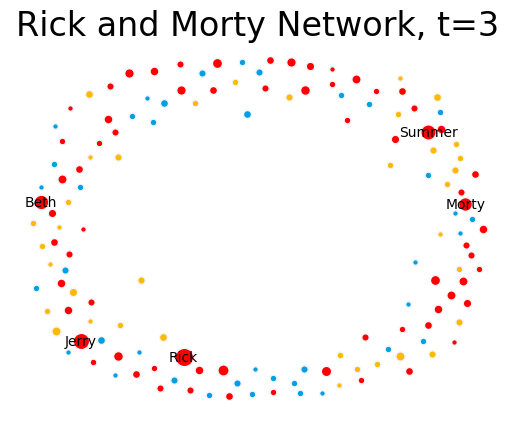

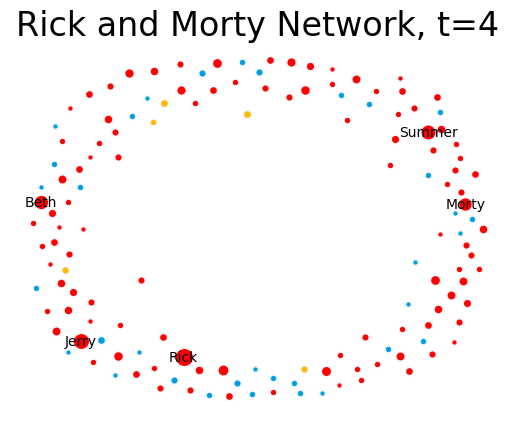

In [64]:
# Función para obtener el nombre del nodo sin caracteres especiales
def clean_node_name(node):
    return node.replace('-', '\n')

# Función para trazar el grafo G con los nombres de los 5 nodos más importantes
def plot_G_with_labels(G, pos, infection_times, t, top_nodes):
    current_infectious = [n for n in infection_times if infection_times[n] == t]

    plt.figure()
    plt.axis('off')
    plt.title('Rick and Morty Network, t={}'.format(t), fontsize=24)

    for node in G.nodes():
        size = 100 * degree_centrality[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size*2, node_color='#feba02')
        elif infection_times.get(node, 9999999) < t:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size*2, node_color='#ff0000')
        else:
            ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size*2, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')

    # Etiquetar los nodos más importantes con sus nombres
    important_labels = {node: clean_node_name(node) for node in top_nodes if node in G.nodes()}
    nx.draw_networkx_labels(G, pos, important_labels, font_size=10)

    for e in G.edges(data=True):
        if e[2].get('weight', 0) > 10:  # Utilizando get() para obtener el atributo 'weight' con valor predeterminado 0
            nx.draw_networkx_edges(G, pos, [e], width=e[2].get('weight', 0) / 100, edge_color='#707070')

infection_times = {'Jessica': -1, 'Goldenfold': -1, 'Principal': 0}
for t in range(5):
    plot_G_with_labels(G, pos, infection_times, t, top_5_nodes)
    infection_times = independent_cascade(G, t, infection_times)

    plt.savefig(f'imagenes/grafica_{t}.png', format='png')
    
plt.show()

Si deseamos profundizar aún más y obtener información específica sobre cuánto tiempo se necesita para que toda la familia se contagie, hemos realizado un análisis utilizando a los personajes Goldenfold, Jessica y Principal como foco central de nuestra atención.

En esta perspectiva más detallada, hemos observado un resultado interesante. En concreto, hemos notado que, en tan solo cuatro iteraciones, el virus o la influencia logra afectar a todos los miembros de la familia. Sin embargo, es importante señalar que, en este proceso, no se propaga a todos los nodos de la red en su totalidad. Este hallazgo subraya la velocidad con la que la influencia se difunde dentro de la familia, al tiempo que resalta que la red en su conjunto puede no estar completamente afectada en este período de tiempo específico.

# FIN